In [1]:
import pandas as pd
import numpy as np

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', None)

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams['font.family'] = 'Malgun Gothic'


pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)

- mu_15: 15분당 평균 대여 자전거 수
- lambda_15: 15분당 평균 반납 자전거 수
- L_s : 대여소 내 평균 자전거 수
- W_s : 대여소 내 평균 대기시간(자전거 반납 후 재대여 될 때까지의 시간)

In [2]:
df = pd.read_excel('./data/1월 대여소별 Ls, Lq, Ws, Wq.xlsx')
df

,자치구,대여소명,시간,lambda_15,mu_15,rho,p_c,L_s,L_q,W_s,W_q
0,중랑구,(구)신한은행 중랑교지점,0,0.153226,0.137097,1.117647,0.371017,1.073998,0.371017,11.143791,3.849673
1,중랑구,(구)신한은행 중랑교지점,1,0.056452,0.072581,0.777778,0.253886,0.834197,0.253886,19.805556,6.027778
2,중랑구,(구)신한은행 중랑교지점,2,0.048387,0.056452,0.857143,0.283465,0.897638,0.283465,25.890110,8.175824
3,중랑구,(구)신한은행 중랑교지점,3,0.048387,0.048387,1.000000,0.333333,1.000000,0.333333,31.000000,10.333333
4,중랑구,(구)신한은행 중랑교지점,4,0.032258,0.048387,0.666667,0.210526,0.736842,0.210526,28.933333,8.266667
...,...,...,...,...,...,...,...,...,...,...,...
52247,강서구,힐스테이트에코,19,0.411290,0.387097,1.062500,0.273172,1.575702,0.803447,5.271012,2.687678
52248,강서구,힐스테이트에코,20,0.322581,0.483871,0.666667,0.123077,1.015385,0.430769,3.589474,1.522807
52249,강서구,힐스테이트에코,21,0.306452,0.330645,0.926829,0.222266,1.405173,0.684346,5.895720,2.871330
52250,강서구,힐스테이트에코,22,0.096774,0.129032,0.750000,0.154286,1.148571,0.514286,14.033784,6.283784


In [3]:
df = df.drop(['p_c', 'L_q', 'W_q'], axis = 1)
df.head()

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s
0,중랑구,(구)신한은행 중랑교지점,0,0.153226,0.137097,1.117647,1.073998,11.143791
1,중랑구,(구)신한은행 중랑교지점,1,0.056452,0.072581,0.777778,0.834197,19.805556
2,중랑구,(구)신한은행 중랑교지점,2,0.048387,0.056452,0.857143,0.897638,25.890110
3,중랑구,(구)신한은행 중랑교지점,3,0.048387,0.048387,1.000000,1.000000,31.000000
4,중랑구,(구)신한은행 중랑교지점,4,0.032258,0.048387,0.666667,0.736842,28.933333


# 자치구별(시간 제외)

In [4]:
dft_pivot_lambda = df.pivot_table(index = ['자치구'], values = ['lambda_15']).T
dft_pivot_lambda.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.067221,0.102354,0.09039,0.164749,0.140633,0.158271,0.116197,0.081425,0.159555,0.096409,0.134556,0.10372,0.156642,0.095803,0.081613,0.151246,0.117475,0.13824,0.178955,0.197194,0.0758,0.106448,0.111315,0.086133,0.108572


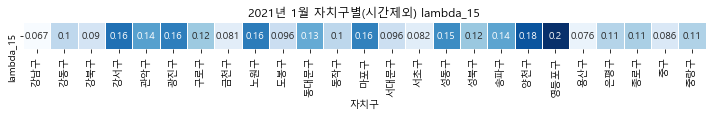

In [5]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) lambda_15')
plt.tight_layout()
plt.show()

In [6]:
dft_pivot_lambda_std = df.pivot_table(index = ['자치구'], values = ['lambda_15'], aggfunc = 'std').T
dft_pivot_lambda_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
lambda_15,0.089719,0.137962,0.102404,0.221991,0.210075,0.222256,0.182101,0.138003,0.175445,0.111206,0.158929,0.130054,0.210625,0.117851,0.126048,0.238301,0.145951,0.172728,0.216675,0.257803,0.118051,0.161288,0.137958,0.116642,0.120235


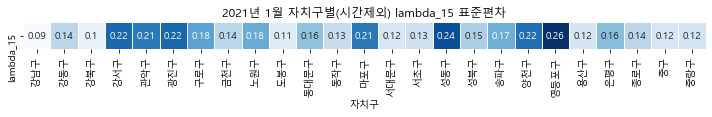

In [7]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [8]:
dft_pivot_mu = df.pivot_table(index = ['자치구'], values = ['mu_15']).T
dft_pivot_mu.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.068754,0.100944,0.0909,0.164575,0.144212,0.158069,0.115752,0.081767,0.15861,0.097375,0.133483,0.101536,0.151571,0.102282,0.08177,0.148052,0.119745,0.13721,0.177382,0.197537,0.07532,0.105381,0.113998,0.089578,0.10838


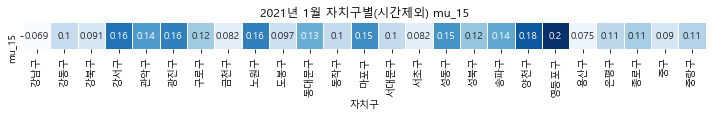

In [9]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) mu_15')
plt.tight_layout()
plt.show()

In [10]:
dft_pivot_mu_std = df.pivot_table(index = ['자치구'], values = ['mu_15'], aggfunc = 'std').T
dft_pivot_mu_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
mu_15,0.085168,0.130637,0.100456,0.209505,0.196263,0.198207,0.174704,0.126629,0.166294,0.105073,0.153344,0.113823,0.191752,0.110518,0.116378,0.210059,0.13266,0.167447,0.201447,0.243167,0.107499,0.144809,0.133234,0.111386,0.110215


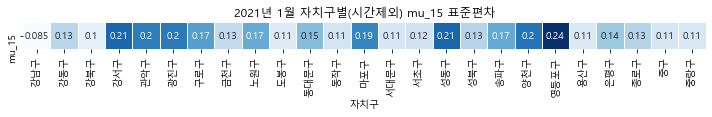

In [11]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) mu_15 표준편차')
plt.tight_layout()
plt.show()

In [12]:
dft_pivot_rho = df.pivot_table(index = ['자치구'], values = ['rho']).T
dft_pivot_rho.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
rho,1.070702,1.129071,1.15373,1.238296,1.083133,1.105939,1.179732,1.361532,1.238427,1.247014,1.263319,1.216095,1.28394,1.107959,1.007392,1.233181,1.130738,1.218926,1.231763,1.268111,1.000617,1.077905,1.062329,1.133443,1.106753


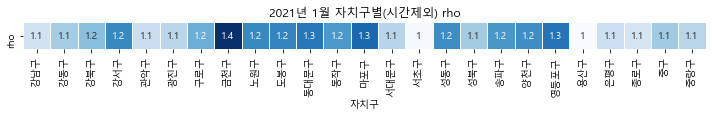

In [13]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) rho')
plt.tight_layout()
plt.show()

In [14]:
dft_pivot_L_s = df.pivot_table(index = ['자치구'], values = ['L_s']).T
dft_pivot_L_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.187314,0.39462,0.303815,0.796057,0.623642,0.744963,0.450818,0.225136,0.74151,0.371252,0.569016,0.409749,0.734442,0.365121,0.293931,0.712916,0.502055,0.592923,0.934605,0.959015,0.305658,0.44623,0.446146,0.270931,0.432532


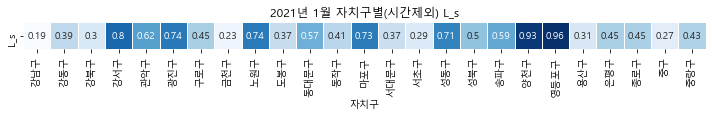

In [15]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) L_s')
plt.tight_layout()
plt.show()

In [16]:
dft_pivot_L_s_std = df.pivot_table(index = ['자치구'], values = ['L_s'], aggfunc = 'std').T
dft_pivot_L_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
L_s,0.376105,0.649883,0.48334,1.051354,1.013336,1.207976,0.790313,0.511631,0.797667,0.545135,0.740795,0.599003,0.981058,0.508101,0.597946,1.103896,0.688148,0.906843,1.133328,1.225336,0.576363,0.824463,0.549148,0.431919,0.533316


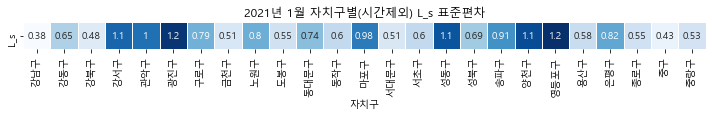

In [17]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) L_s 표준편차')
plt.tight_layout()
plt.show()

In [18]:
dft_pivot_W_s = df.pivot_table(index = ['자치구'], values = ['W_s']).T
dft_pivot_W_s.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,6.798712,10.221626,7.669846,16.373525,11.474445,14.53524,11.840761,8.282251,17.064088,11.768545,13.226881,11.244589,17.161095,11.11917,8.220538,16.183668,12.557482,14.365577,21.637839,20.266042,9.898494,9.497935,13.255027,8.189892,11.419037


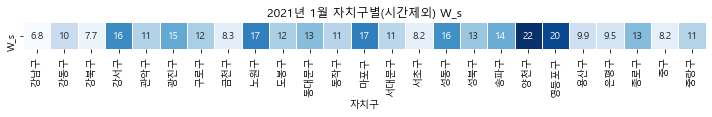

In [19]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) W_s')
plt.tight_layout()
plt.show()

In [20]:
dft_pivot_W_s_std = df.pivot_table(index = ['자치구'], values = ['W_s'], aggfunc = 'std').T
dft_pivot_W_s_std.head()

자치구,강남구,강동구,강북구,강서구,관악구,광진구,구로구,금천구,노원구,도봉구,동대문구,동작구,마포구,서대문구,서초구,성동구,성북구,송파구,양천구,영등포구,용산구,은평구,종로구,중구,중랑구
W_s,21.158795,32.434009,20.122536,42.663152,29.768322,52.993156,37.409407,35.316981,37.680015,27.792324,33.98169,26.175917,43.997893,27.716154,25.797071,44.099554,29.792679,39.534692,57.94283,51.160093,32.061278,30.876873,31.914112,23.805163,25.651245


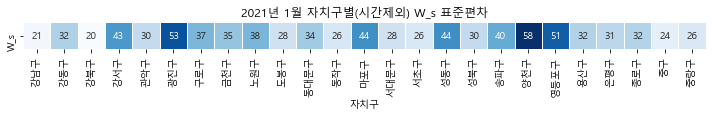

In [21]:
plt.figure(figsize = (10, 14))
sns.heatmap(dft_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별(시간제외) W_s 표준편차')
plt.tight_layout()
plt.show()

# 자치구별 시간별

In [22]:
df_pivot_lambda = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'])
df_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.028856  0.023004  0.024126  0.015655  0.009488  0.008742  0.011927   
강동구  0.040652  0.040786  0.031320  0.015379  0.017067  0.020349  0.042948   
강북구  0.051411  0.050711  0.042920  0.027884  0.024740  0.021460  0.024194   
강서구  0.054675  0.044969  0.028387  0.019785  0.015914  0.023871  0.050806   
관악구  0.074625  0.075983  0.057860  0.040195  0.020993  0.026114  0.045571   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.042898  0.100705  0.068515  0.049404  0.056519  0.078273  0.095351   
강동구  0.063485  0.130908  0.082427  0.070705  0.080176  0.108590  0.131377   
강북구  0.051531  0.123155  0.058639  0.059049  0.069163  0.110169  0.122061   
강서구  0.115161  0.313710  0.165753  0.117796  0.141667  0.202634  0.220430   
관악구  0.066948  0.146569  0.095750  0.090118  0.105223  0.154250  0.186636   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.096978  0.115885  0.128626  0.150312  0.156208  0.109176  0.080713   
강동구  0.147412  0.176107  0.173106  0.207052  0.241279  0.180608  0.139254   
강북구  0.130399  0.143794  0.162247  0.168398  0.182750  0.138874  0.125478   
강서구  0.222258  0.245484  0.276774  0.340161  0.417043  0.291720  0.215914   
관악구  0.193164  0.219662  0.240143  0.273938  0.326421  0.274194  0.201101   

                                   
시간         21        22        23  
자치구                                
강남구  0.078070  0.052589  0.035308  
강동구  0.159040  0.105683  0.060109  
강북구  0.130399  0.089666  0.063559  
강서구  0.218763  0.138118  0.086183  
관악구  0.214158  0.149258  0.105735

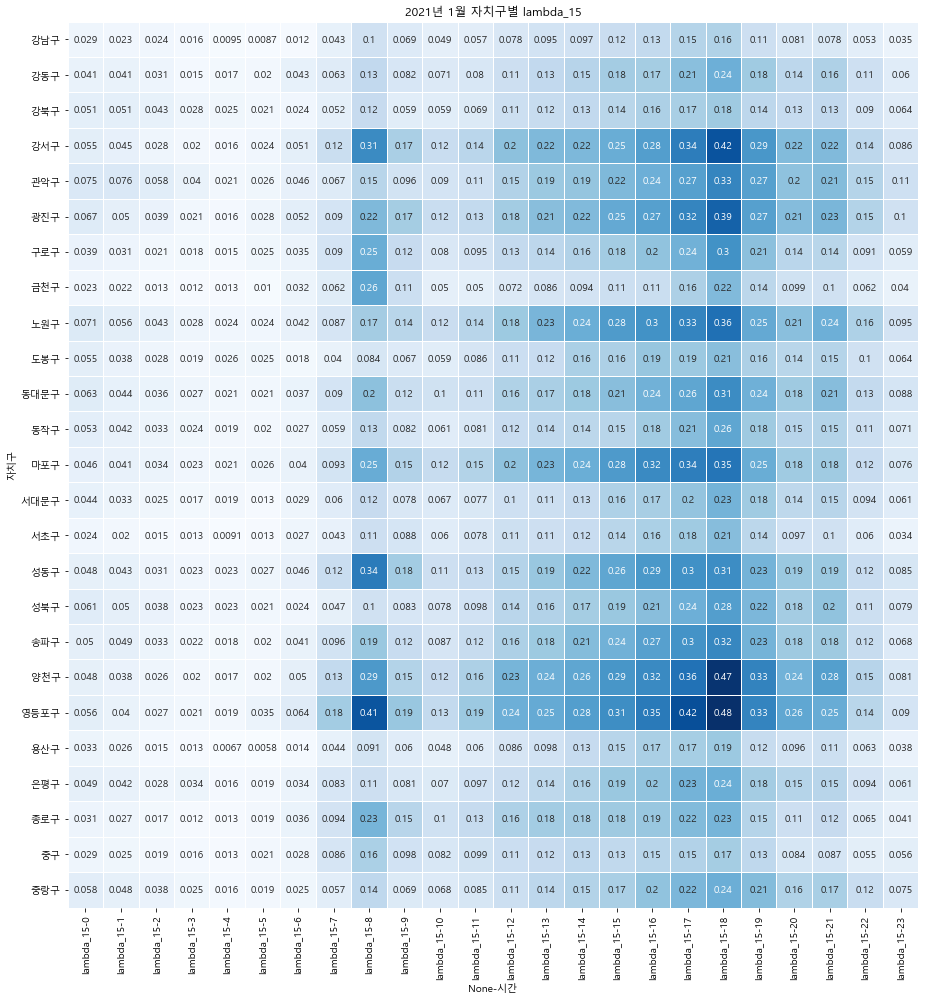

In [23]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 lambda_15')
plt.tight_layout()
plt.show()

In [24]:
df_pivot_lambda_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
df_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.033268  0.026730  0.030762  0.021955  0.012671  0.019262  0.025216   
강동구  0.052837  0.048611  0.042913  0.025159  0.033018  0.045380  0.074945   
강북구  0.048991  0.047923  0.044787  0.037627  0.032461  0.033339  0.032980   
강서구  0.052992  0.051893  0.035734  0.028731  0.027810  0.044140  0.087701   
관악구  0.086070  0.083954  0.071423  0.060583  0.029419  0.052797  0.088154   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.070461  0.154882  0.075337  0.050391  0.050510  0.065275  0.084885   
강동구  0.095603  0.210430  0.111474  0.081726  0.080373  0.103200  0.117433   
강북구  0.077930  0.153663  0.064531  0.056560  0.074550  0.096920  0.100809   
강서구  0.205506  0.412181  0.225645  0.127832  0.135849  0.183015  0.207326   
관악구  0.105880  0.233249  0.128564  0.101157  0.107637  0.165099  0.190312   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.089060  0.102213  0.130205  0.137841  0.137542  0.086589  0.066198   
강동구  0.132754  0.158176  0.154421  0.187216  0.234066  0.172372  0.134100   
강북구  0.109384  0.116088  0.133601  0.125687  0.141330  0.118827  0.102746   
강서구  0.187110  0.193574  0.223868  0.306633  0.366965  0.248129  0.183973   
관악구  0.221593  0.253821  0.297699  0.342635  0.368288  0.318911  0.224043   

                                   
시간         21        22        23  
자치구                                
강남구  0.066592  0.048442  0.038159  
강동구  0.153725  0.107495  0.074937  
강북구  0.103679  0.073974  0.051335  
강서구  0.184887  0.122041  0.079155  
관악구  0.227840  0.160514  0.125053

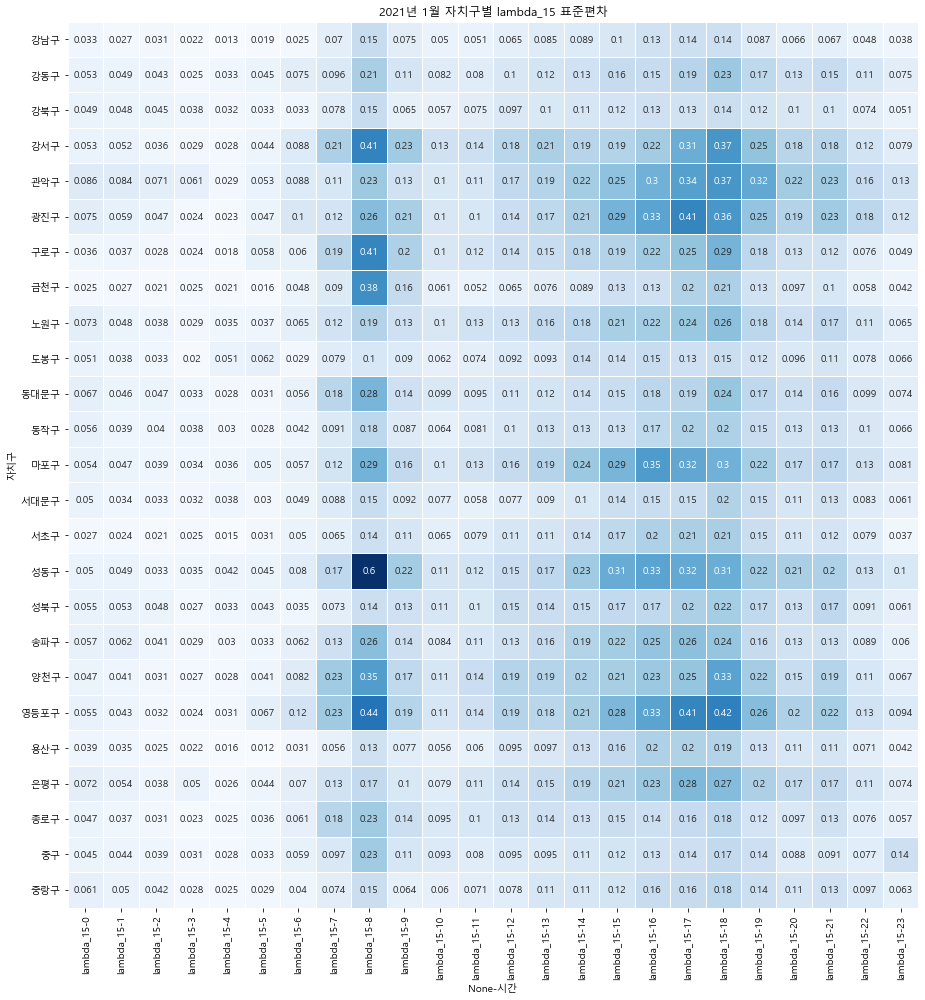

In [25]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [26]:
df_pivot_mu = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'])
df_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.025958  0.020293  0.023177  0.012402  0.007929  0.009081  0.016197   
강동구  0.035221  0.030775  0.020536  0.013597  0.017254  0.027101  0.049325   
강북구  0.054940  0.044560  0.035402  0.021186  0.023783  0.023237  0.026244   
강서구  0.046803  0.037172  0.025699  0.020161  0.017043  0.027688  0.056989   
관악구  0.065311  0.072077  0.046467  0.032898  0.023041  0.028162  0.055812   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.038290  0.091692  0.063025  0.053605  0.071700  0.089116  0.099620   
강동구  0.082427  0.143192  0.091148  0.081677  0.101932  0.118905  0.144317   
강북구  0.059459  0.101832  0.066840  0.062876  0.088300  0.116730  0.138464   
강서구  0.141075  0.309731  0.157366  0.127312  0.171022  0.221505  0.232312   
관악구  0.113159  0.198157  0.113543  0.108551  0.127880  0.192012  0.223374   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.114394  0.126931  0.132353  0.153158  0.164272  0.104093  0.085050   
강동구  0.169917  0.183890  0.173950  0.198050  0.212866  0.149662  0.138222   
강북구  0.148989  0.149945  0.157736  0.159923  0.190951  0.139557  0.114270   
강서구  0.238871  0.257151  0.273172  0.350699  0.405269  0.254409  0.210376   
관악구  0.218638  0.248336  0.238735  0.254608  0.281746  0.217102  0.192396   

                                   
시간         21        22        23  
자치구                                
강남구  0.079696  0.042627  0.029886  
강동구  0.122468  0.080833  0.045386  
강북구  0.134090  0.072854  0.052488  
강서구  0.195968  0.117043  0.069946  
관악구  0.206989  0.126728  0.086534

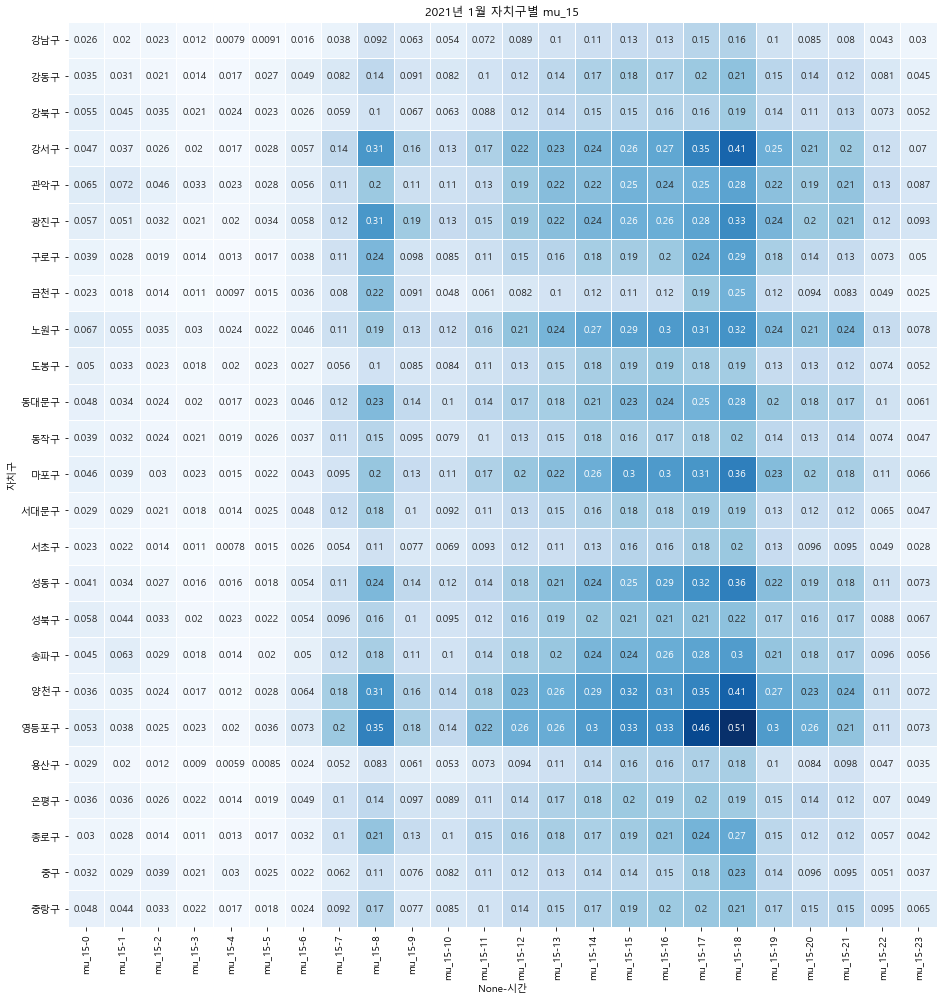

In [27]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 mu_15')
plt.tight_layout()
plt.show()

In [28]:
df_pivot_mu_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
df_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.024953  0.021926  0.026091  0.013147  0.014046  0.023111  0.030941   
강동구  0.043811  0.040761  0.030267  0.022069  0.035340  0.052584  0.083767   
강북구  0.059173  0.044459  0.043118  0.025054  0.027873  0.032400  0.031111   
강서구  0.050222  0.040430  0.031008  0.031321  0.033759  0.042698  0.072948   
관악구  0.073625  0.078437  0.063561  0.050908  0.037179  0.043834  0.074960   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.048047  0.101412  0.061668  0.045117  0.053667  0.063785  0.082139   
강동구  0.092260  0.179635  0.113073  0.082510  0.084481  0.104001  0.118530   
강북구  0.066449  0.107154  0.064011  0.050536  0.061898  0.078437  0.099619   
강서구  0.149080  0.341933  0.157264  0.090377  0.123127  0.163376  0.173541   
관악구  0.156027  0.223991  0.115405  0.098331  0.129785  0.177543  0.216610   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.091300  0.098767  0.106587  0.121425  0.145404  0.091475  0.076656   
강동구  0.141946  0.159510  0.143787  0.182524  0.214741  0.160351  0.139403   
강북구  0.094871  0.099518  0.106634  0.133299  0.173627  0.137197  0.108302   
강서구  0.183806  0.189944  0.212217  0.297677  0.390703  0.245692  0.200346   
관악구  0.228697  0.255713  0.250953  0.281349  0.293581  0.269133  0.223902   

                                   
시간         21        22        23  
자치구                                
강남구  0.074234  0.041761  0.028140  
강동구  0.133426  0.072216  0.051438  
강북구  0.123362  0.058557  0.047223  
강서구  0.194100  0.104781  0.062631  
관악구  0.250386  0.150793  0.101692

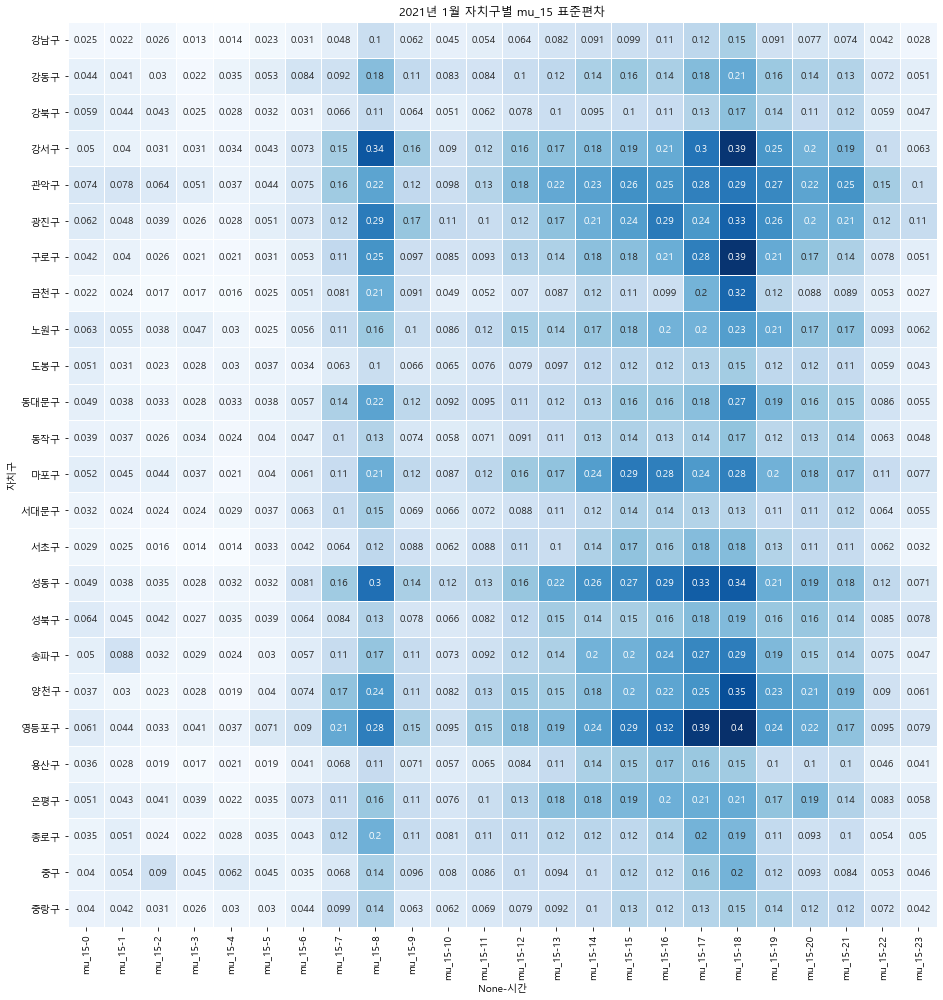

In [29]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [30]:
df_pivot_rho = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['rho'])
df_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.981419  1.015156  1.117334  0.854851  0.473636  0.290916  0.628832   
강동구  0.943298  1.259771  1.054543  0.892270  0.518661  0.571558  1.265555   
강북구  1.149356  1.222558  1.351934  1.856574  1.294623  0.939918  0.650297   
강서구  1.328794  1.224305  1.153668  0.835700  0.693426  0.665464  1.541616   
관악구  1.042131  1.242553  1.286766  1.179498  0.854036  1.048227  0.971563   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  1.444061  1.504124  1.558920  1.069546  0.834065  0.926469  1.109115   
강동구  1.160895  1.344127  1.133666  0.981478  0.997459  1.001250  0.916995   
강북구  1.327129  1.547060  0.921748  0.895953  0.816990  0.973086  0.986925   
강서구  1.835178  2.282142  1.747860  0.980925  0.842265  0.885402  0.931831   
관악구  1.475982  0.841616  1.039527  0.948875  0.887069  0.856801  0.978272   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.880678  0.964722  0.959445  0.998360  1.199839  1.557107  1.216128   
강동구  1.013493  1.029355  1.011735  1.186555  1.374127  1.601586  1.289718   
강북구  0.826954  0.940260  1.018652  1.216220  1.227267  1.203851  1.349525   
강서구  1.007795  1.012988  1.031554  1.070924  1.420132  1.323662  1.275389   
관악구  0.901564  0.840043  0.949042  1.017767  1.114706  1.286373  1.192884   

                                   
시간         21        22        23  
자치구                                
강남구  1.317324  1.369269  1.433679  
강동구  1.835583  1.489053  1.249380  
강북구  1.442228  1.426311  1.104480  
강서구  1.543247  1.514291  1.559788  
관악구  1.329105  1.396167  1.317292

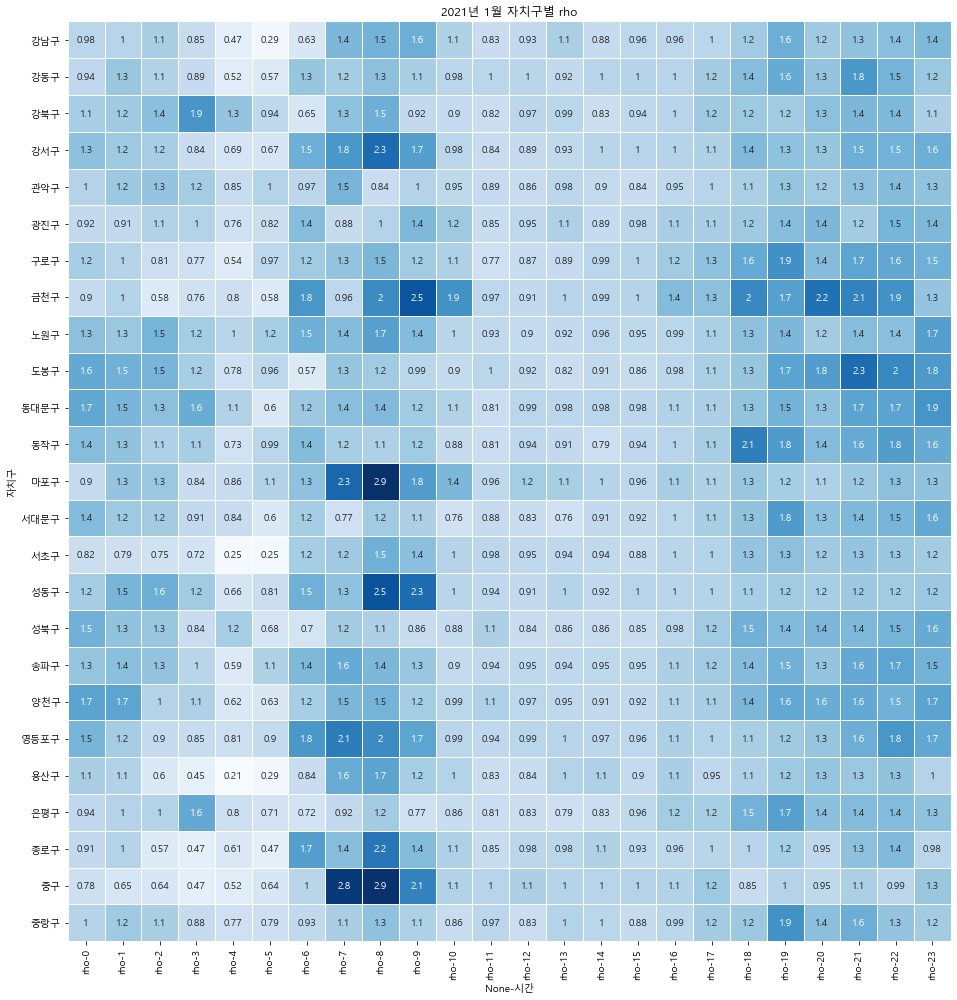

In [31]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 rho')
plt.tight_layout()
plt.show()

In [32]:
df_pivot_L_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'])
df_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.198512  0.173578  0.164487  0.177486  0.127418  0.055782  0.083197   
강동구  0.415335  0.431645  0.402148  0.342213  0.319253  0.283837  0.366965   
강북구  0.296852  0.310545  0.302046  0.262230  0.266537  0.203483  0.238262   
강서구  0.697985  0.779597  0.711737  0.512073  0.483157  0.544792  0.827081   
관악구  0.633468  0.665376  0.612007  0.634832  0.555423  0.437689  0.560883   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.227286  0.212501  0.187055  0.197068  0.189101  0.208611  0.208314   
강동구  0.277587  0.343435  0.373131  0.394572  0.354237  0.391681  0.396568   
강북구  0.364659  0.369289  0.325891  0.294387  0.295557  0.322757  0.303598   
강서구  0.756876  0.730018  0.837912  0.866332  0.778615  0.853473  0.887143   
관악구  0.525455  0.523650  0.587306  0.613639  0.550331  0.551046  0.549999   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.195211  0.195604  0.213992  0.221096  0.212629  0.212103  0.189084   
강동구  0.378590  0.406364  0.424065  0.424103  0.444169  0.459069  0.417636   
강북구  0.307647  0.327399  0.343854  0.304152  0.288023  0.310871  0.311686   
강서구  0.850399  0.845840  0.898550  0.925575  0.895596  0.913060  0.839268   
관악구  0.626548  0.632803  0.708272  0.723009  0.753091  0.772916  0.680574   

                                   
시간         21        22        23  
자치구                                
강남구  0.192587  0.233400  0.218932  
강동구  0.455864  0.463183  0.501900  
강북구  0.274107  0.357453  0.310860  
강서구  0.874579  0.883681  0.923916  
관악구  0.634504  0.703624  0.729053

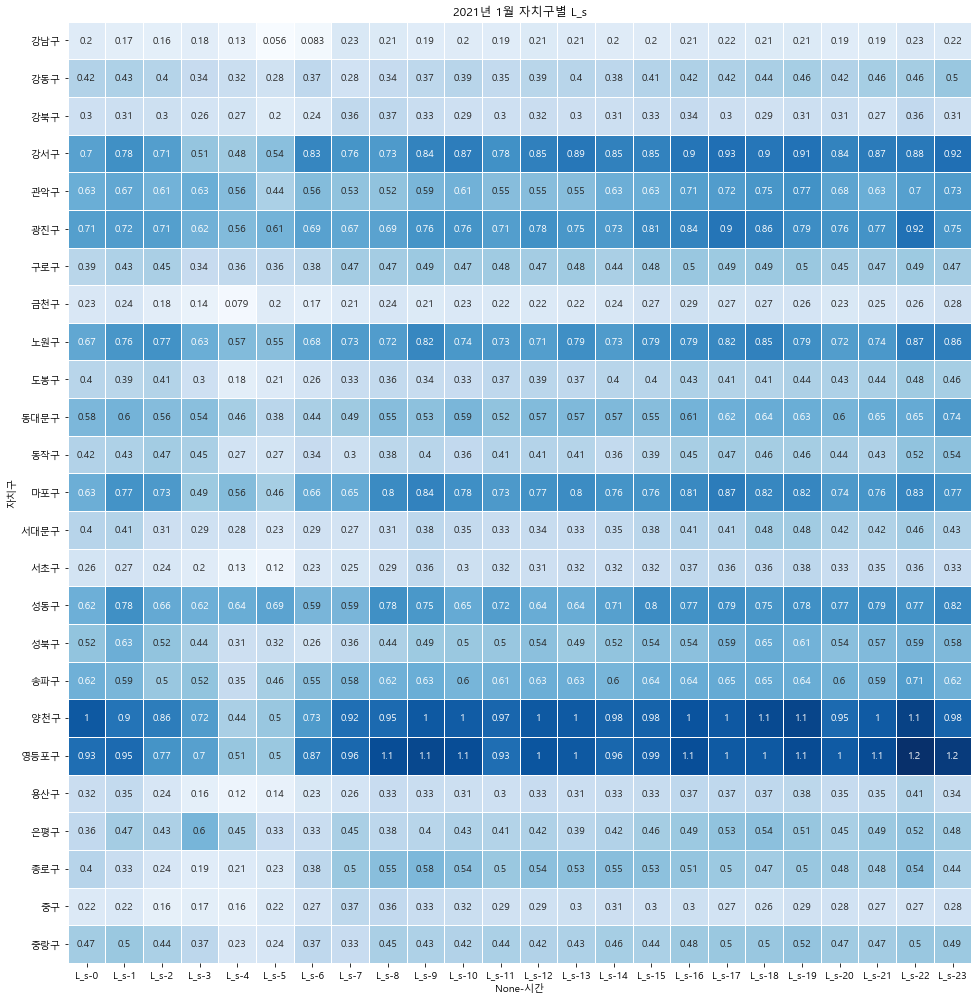

In [33]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 L_s')
plt.tight_layout()
plt.show()

In [34]:
df_pivot_L_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
df_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
자치구                                                                         
강남구  0.425213  0.332792  0.347101  0.453197  0.338958  0.195459  0.255012   
강동구  0.724357  0.653012  0.665036  0.674595  0.810291  0.644281  0.826412   
강북구  0.491371  0.438635  0.479620  0.490564  0.500764  0.509461  0.481366   
강서구  0.895290  1.095952  1.221536  0.939669  1.110412  1.319710  1.459125   
관악구  1.019710  0.971466  0.995497  1.172418  1.168436  1.005780  1.062414   

                                                                           \
시간         7         8         9         10        11        12        13   
자치구                                                                         
강남구  0.490951  0.409900  0.404886  0.360103  0.336225  0.384007  0.370123   
강동구  0.619045  0.655694  0.578994  0.630209  0.612156  0.576920  0.545914   
강북구  0.651478  0.606002  0.517091  0.427692  0.500547  0.476534  0.448007   
강서구  1.297505  0.951718  1.139124  1.223637  0.984596  0.996436  1.045274   
관악구  1.132016  0.969070  1.079532  1.019833  0.841594  0.803077  0.795894   

                                                                           \
시간         14        15        16        17        18        19        20   
자치구                                                                         
강남구  0.333589  0.341602  0.383607  0.399075  0.385648  0.381536  0.306843   
강동구  0.567758  0.549554  0.593027  0.615400  0.628652  0.655246  0.610409   
강북구  0.453873  0.464976  0.501074  0.424777  0.409544  0.464549  0.454176   
강서구  0.940470  0.855549  0.953623  0.996240  0.914930  0.916824  0.840180   
관악구  0.935649  0.880461  1.100829  1.159240  1.147680  1.112613  0.942160   

                                   
시간         21        22        23  
자치구                                
강남구  0.351075  0.440136  0.449552  
강동구  0.636776  0.669030  0.777839  
강북구  0.391360  0.514334  0.487033  
강서구  0.876567  0.881249  0.995668  
관악구  0.840394  0.982830  1.128864

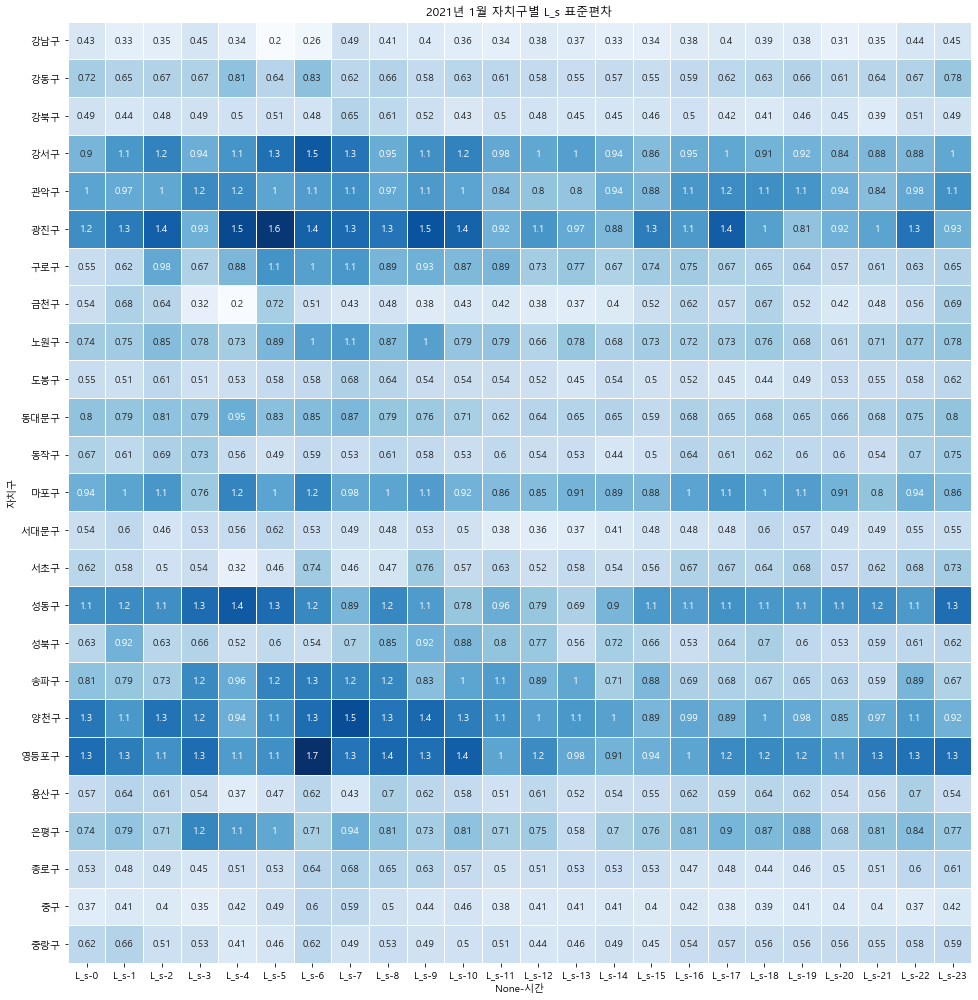

In [35]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [36]:
df_pivot_W_s = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'])
df_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  11.545904  14.549493  12.308096  16.830409  15.631042   8.091136   
강동구  15.658422  20.735044  22.253236  35.317409  26.152459  22.941174   
강북구   8.294380  12.276920  14.978415  21.180015  22.364715  11.608993   
강서구  25.783054  39.303356  41.965736  44.415430  41.378484  26.875100   
관악구  11.627614  14.346177  21.942056  26.145103  35.231418  31.764402   

                                                                              \
시간          6          7         8          9         10        11        12   
자치구                                                                            
강남구   9.682948  11.264081  5.773191   4.749670  5.661432  3.876083  3.012137   
강동구  18.463062   7.281458  3.252997   7.139565  7.463181  4.516328  3.922432   
강북구  12.775948  15.835151  7.305262   7.282038  6.756447  4.537116  3.262390   
강서구  35.932576  15.318875  5.512384  11.093911  9.921337  6.703410  5.184823   
관악구  29.457659  15.347581  5.979523   9.236068  8.872827  6.337798  4.491299   

                                                                           \
시간         13        14        15        16        17        18        19   
자치구                                                                         
강남구  2.578855  2.064404  1.966657  1.869907  1.667318  1.778190  3.073870   
강동구  3.213155  2.936044  2.687214  2.855888  2.330237  2.229862  3.653679   
강북구  2.638335  2.517214  2.388922  2.350364  2.034986  1.949311  2.983875   
강서구  5.026496  4.788373  4.366582  4.360503  3.644422  3.571134  5.315049   
관악구  3.416878  4.030035  3.571549  3.644217  3.569979  3.040629  4.466273   

                                               
시간         20        21         22         23  
자치구                                            
강남구  3.602729  2.901088   7.403017  10.733006  
강동구  3.752098  4.768686   6.834651  14.079860  
강북구  3.260644  2.814840   6.086853   6.540238  
강서구  6.503976  7.693159  13.505324  23.519090  
관악구  4.490348  4.458309   7.969866  11.884036

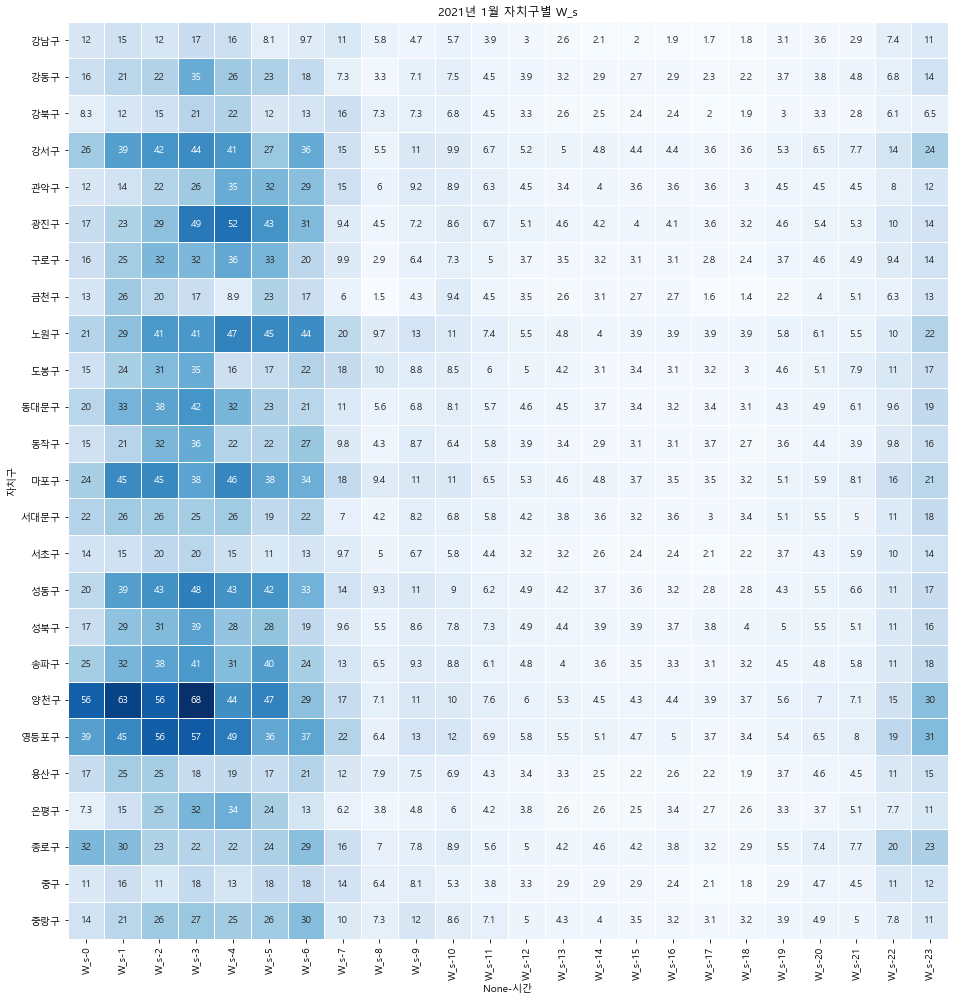

In [37]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 W_s')
plt.tight_layout()
plt.show()

In [38]:
df_pivot_W_s_std = df.pivot_table(index = ['자치구'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
df_pivot_W_s_std.head()

W_s                                                         \
시간          0          1          2          3          4          5    
자치구                                                                     
강남구  24.830712  33.426354  27.062912  40.762846  41.179540  28.449919   
강동구  33.871105  37.076902  43.495771  72.142565  80.610162  55.709895   
강북구  13.907866  21.315169  28.447451  40.058960  47.792227  28.072019   
강서구  34.508761  77.769408  63.109020  86.285580  91.625482  61.634752   
관악구  17.862490  19.698460  48.178150  37.878029  55.235800  83.731253   

                                                                      \
시간          6          7          8          9          10        11   
자치구                                                                    
강남구  31.478448  29.743886  16.462508   9.976004  13.545095  7.068682   
강동구  51.108188  17.256682   5.761967  13.195785  15.334478  6.100216   
강북구  23.955415  37.480705  18.309145  11.317264  10.039220  5.991148   
강서구  73.183332  29.163390   8.564191  19.228572   9.235578  5.717808   
관악구  56.600203  29.569030   8.368387  11.862098  10.232297  5.752423   

                                                                           \
시간         12        13        14        15        16        17        18   
자치구                                                                         
강남구  5.269514  4.646061  3.413614  3.766198  3.093841  2.693625  3.455570   
강동구  5.279186  4.052599  4.413930  3.619157  3.882066  2.989539  2.962933   
강북구  4.156231  3.433393  3.085597  2.936023  2.958736  2.525609  2.795399   
강서구  3.952785  4.496396  3.631758  3.210285  3.347231  2.921457  3.241358   
관악구  5.013366  2.851770  3.794899  3.394417  3.371117  3.235588  2.605915   

                                                          
시간         19         20        21         22         23  
자치구                                                       
강남구  7.738890  11.931962  5.092149  16.004178  23.404684  
강동구  5.308006   6.014239  8.060207  10.130620  22.561443  
강북구  4.494489   4.398138  3.879710   9.369985  10.177723  
강서구  4.770080   6.395778  8.162620  15.842158  32.460245  
관악구  4.645482   4.207872  4.551272   8.704956  12.785481

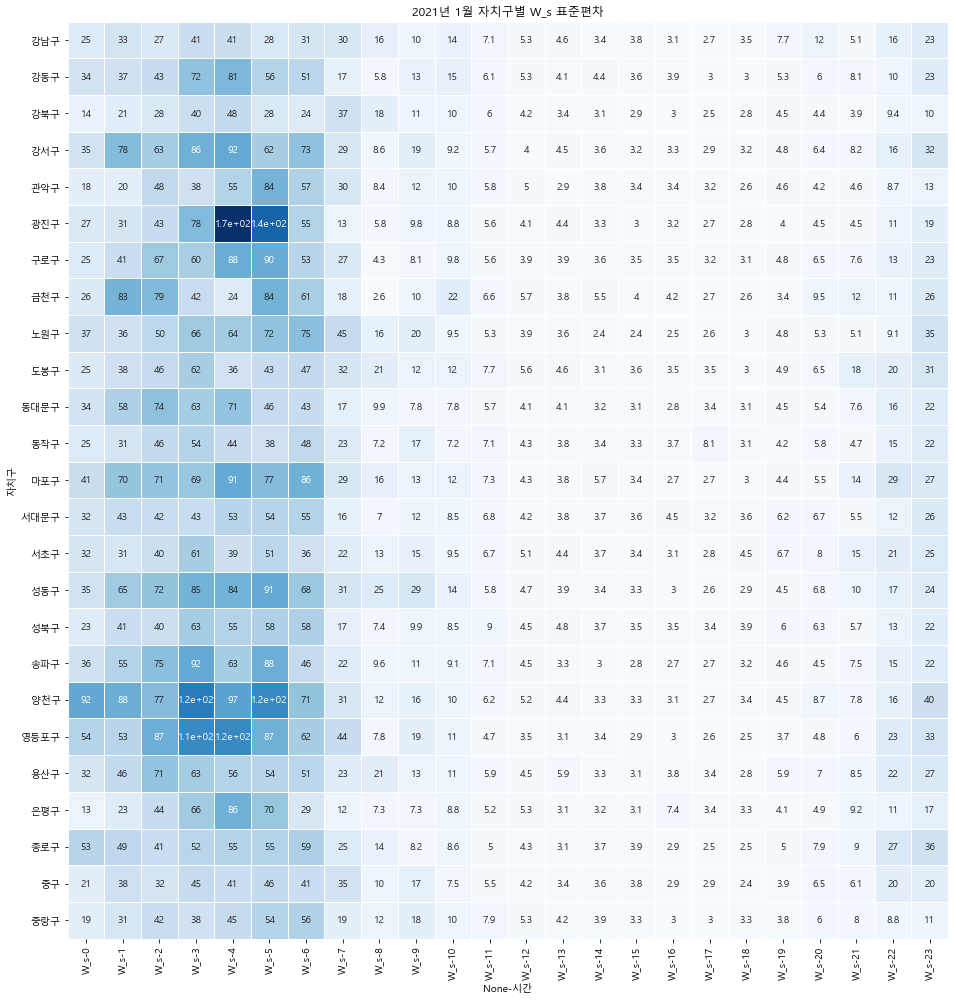

In [39]:
plt.figure(figsize = (24, 14))
sns.heatmap(df_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 자치구별 W_s 표준편차')
plt.tight_layout()
plt.show()

# 학교/ 아파트/ 지하철역/공원 근처 대여소 분석

In [40]:
s = pd.DataFrame(df['대여소명'].unique()).rename(columns = {0 : 'station'})
s

,station
0,(구)신한은행 중랑교지점
1,(시립)고덕평생학습관
2,(재)FITI시험연구원
3,3호선 매봉역 3번출구앞
4,419민주묘지 입구사거리
...,...
2160,흑석한강푸르지오(110동)
2161,흥국사 정류장
2162,희성오피앙
2163,희훈타워빌 앞


In [41]:
school = []
subway = []
apart = []
park = []
for i in range(len(s)):
    if '출구' in s['station'][i]:
        subway.append(s['station'][i])
    elif '학교' in s['station'][i]:
        school.append(s['station'][i])
    elif '아파트' in s['station'][i]:
        apart.append(s['station'][i]) 
    elif '공원' in s['station'][i]:
        park.append(s['station'][i])

In [42]:
school

['KC 대학교',
 '가락고등학교 앞',
 '가재울 초등학교',
 '강남중학교 앞',
 '강동경희대학교병원 입구',
 '강북중학교 앞',
 '강서공업고등학교 앞',
 '강서초등학교',
 '개포고등학교 정문앞',
 '거여초등학교 옆',
 '건국대학교 (입학정보관)',
 '건국대학교 (행정관)',
 '건국대학교 과학관(이과대) 앞',
 '건국대학교 학생회관',
 '경기여자고등학교 후문 (삼성로3길 입구)',
 '경문고등학교 앞',
 '경일중학교 앞',
 '경희대학교 청운관',
 '고덕초등학교',
 '공항중학교 버스정류장',
 '공항중학교앞',
 '공항초등학교건너편',
 '광남중학교',
 '광양중학교 앞',
 '광운대학교 중앙도서관',
 '광운초등학교 앞',
 '구로중학교앞',
 '구암초등학교 버스정류장',
 '구일고등학교 정문',
 '노일초등학교 앞',
 '답십리초등학교 앞(현대시장 옆)',
 '답십리초등학교 옆 공원',
 '대광고등학교',
 '대진고등학교',
 '도봉고등학교 맞은편',
 '독산고등학교',
 '동대문중학교 옆',
 '동성중학교 앞',
 '동양미래대학교 정문 옆',
 '마곡엠밸리6_7단지 마곡중학교',
 '마곡중학교 후문',
 '면목초등학교',
 '명지대학교 도서관',
 '명지전문대학교 정문 앞',
 '모두의학교',
 '목동1단지아파트 118동 앞 (월촌초등학교 정류소 옆)',
 '목동1단지아파트 상가 앞 (월촌중학교 버스정류소 옆)',
 '묘곡초등학교',
 '문래중학교',
 '밀알학교 입구 (삼성서울병원 입구)',
 '반포중학교 앞(세화여고 맞은편)',
 '방이초등학교',
 '방학중학교 앞',
 '배명고등학교',
 '백석예술대학교 제3캠퍼스 앞',
 '보성중고등학교 후문 앞',
 '북가좌 초등학교',
 '불암고등학교 앞 횡단보도',
 '사당중학교 버스정류소',
 '삼일초등학교 인근',
 '상계중학교(당현2교사거리)',
 '상신초등학교앞 버스정류장',
 '상암월드컵파크5단지(상암중학교)',
 '상암중학교 옆',
 '상일초등학교',
 '새솔초등학교'

In [43]:
len(school)

138

In [44]:
school_data = []
for i in range(len(df)):
    if df['대여소명'][i] in school:
        school_data.append(df.loc[i])
school_data = pd.DataFrame(school_data)
school_data['특성'] = '학교'
school_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
990,강서구,KC 대학교,0,0.048387,0.008065,6.000000,0.0,0.0,학교
991,강서구,KC 대학교,1,0.072581,0.016129,4.500000,0.0,0.0,학교
992,강서구,KC 대학교,2,0.024194,0.000000,0.000000,0.0,0.0,학교
993,강서구,KC 대학교,3,0.000000,0.016129,0.000000,0.0,0.0,학교
994,강서구,KC 대학교,4,0.032258,0.000000,0.000000,0.0,0.0,학교
...,...,...,...,...,...,...,...,...,...
52007,동대문구,휘봉고등학교 앞,19,0.096774,0.080645,1.200000,0.0,0.0,학교
52008,동대문구,휘봉고등학교 앞,20,0.104839,0.048387,2.166667,0.0,0.0,학교
52009,동대문구,휘봉고등학교 앞,21,0.072581,0.064516,1.125000,0.0,0.0,학교
52010,동대문구,휘봉고등학교 앞,22,0.080645,0.048387,1.666667,0.0,0.0,학교


In [45]:
subway

['3호선 매봉역 3번출구앞',
 '419민주묘지역 1번출구',
 '7호선 이수역7번출구',
 '9호선종합운동장역 9번출구',
 'DMC역 2번출구 옆',
 'DMC역 9번출구 앞',
 'DMC역7번출구',
 '가락시장역 3번 출구',
 '가로공원공영주차장 1번 출구',
 '가산디지털단지 7번출구',
 '가양역 8번출구',
 '가좌역 4번출구 앞',
 '가좌역1 번출구 뒤',
 '강남구청역 2번출구 뒤',
 '강남파이낸스센터앞(역삼역2번출구)',
 '강동역 1번출구 앞',
 '강변역 4번출구 뒤',
 '개봉역 1번 출구 자전거보관서쪽',
 '개화산역 2번 출구',
 '거여역 3번출구',
 '거여역 8번출구 뒤',
 '건대입구역 5번출구 뒤',
 '경복궁역 4번출구 뒤',
 '경복궁역 7번출구 앞',
 '경찰병원역 1,2번 출구 사이',
 '경찰병원역 3번출구 앞',
 '고덕역 4번출구',
 '고덕역 5번출구',
 '고려대학교 2번출구',
 '고속터미널역 5번출구 앞',
 '고속터미널역 8-1번, 8-2번 출구 사이',
 '공덕역 2번출구',
 '공덕역 5번출구',
 '공덕역 8번출구',
 '공릉역 1번 출구 앞',
 '공항시장역 2번출구 뒤',
 '공항시장역 4번출구',
 '광나루역 3번 출구',
 '광화문역 1번출구 앞',
 '광화문역 2번출구 앞',
 '광화문역 5번출구',
 '광화문역 6번출구 옆',
 '광화문역 7번출구 앞',
 '광흥창역 2번출구 앞',
 '광흥창역5번출구',
 '교대역 5번출구뒤',
 '교대역 6번출구',
 '교보타워 버스정류장(신논현역 3번출구 후면)',
 '구산역 2번 출구',
 '구산역 4번출구',
 '구파발역 2번출구',
 '국회의사당역 3번출구 옆',
 '국회의사당역 5번출구 옆',
 '군자역 7번출구 베스트샵 앞',
 '군자역 7번출구뒤',
 '군자역2번출구',
 '금호역 1번출구 앞',
 '금호역 3번출구',
 '길음역 3번출구 뒤',
 '까치산역 3번 출구',
 '낙성대역 1번출구',
 '낙성대역 3번출구 뒤',
 '남

In [46]:
len(subway)

417

In [47]:
subway_data = []
for i in range(len(df)):
    if df['대여소명'][i] in subway:
        subway_data.append(df.loc[i])
subway_data = pd.DataFrame(subway_data)
subway_data['특성'] = '지하철'
subway_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
73,강남구,3호선 매봉역 3번출구앞,0,0.032258,0.040323,0.800000,0.852459,35.822222,지하철
74,강남구,3호선 매봉역 3번출구앞,1,0.008065,0.040323,0.200000,0.225806,28.933333,지하철
75,강남구,3호선 매봉역 3번출구앞,2,0.008065,0.040323,0.200000,0.225806,28.933333,지하철
76,강남구,3호선 매봉역 3번출구앞,3,0.016129,0.008065,2.000000,1.428571,206.666667,지하철
77,강남구,3호선 매봉역 3번출구앞,4,0.008065,0.016129,0.500000,0.571429,82.666667,지하철
...,...,...,...,...,...,...,...,...,...
52103,동작구,흑석역 4번출구,19,0.120968,0.120968,1.000000,0.000000,0.000000,지하철
52104,동작구,흑석역 4번출구,20,0.088710,0.072581,1.222222,0.000000,0.000000,지하철
52105,동작구,흑석역 4번출구,21,0.032258,0.056452,0.571429,0.000000,0.000000,지하철
52106,동작구,흑석역 4번출구,22,0.088710,0.040323,2.200000,0.000000,0.000000,지하철


In [48]:
apart

['DMC센트럴아이파크아파트',
 'DMC엘가아파트 앞',
 'ESA아파트 상가 앞',
 'LG한강 자이아파트 앞',
 'LIGA 아파트 앞',
 'LIG강촌아파트 103동앞',
 'e 편한세상 보문아파트 내',
 '가락미륭아파트 앞',
 '가락삼환아파트 앞',
 '강남한양수자인아파트',
 '강동롯데캐슬퍼스트 아파트(관리동)',
 '강변아파트 310동 앞',
 '개봉아이파크아파트 앞',
 '개봉푸르지오아파트 상가',
 '개포1단지아파트 입구 (보도육교)',
 '개포래미안포레스트아파트 107동 앞',
 '건영아파트 앞',
 '고덕동 아남아파트',
 '고척LIGA아파트 앞',
 '공릉1단지아파트',
 '공릉동풍림아파트 101동',
 '공릉풍림아파트 108동',
 '구로동롯데아파트',
 '구룡마을 입구 (래미안블레스티지 아파트)',
 '구룡초사거리 (현대아파트10동 앞 )',
 '구룡터널 입구(개포1단지아파트)',
 '구의7단지현대아파트',
 '그랜드아이파크아파트 앞',
 '극동늘푸른아파트',
 '금강수목원아파트 앞',
 '금호 어울림 아파트 앞',
 '길성그랑프리텔아파트',
 '길음뉴타운푸르지오아파트 3단지',
 '길음래미안아파트817동 상가 앞',
 '남산타운아파트 버스정류장',
 '다성이즈빌아파트(호원대 대각선 맞은편)',
 '답십리 래미안엘파인아파트 입구',
 '답십리파크자이아파트 앞',
 '대림경동아파트앞',
 '대림아파트 사거리',
 '대림아파트 후문 상가 옆',
 '대호프라자아파트',
 '도곡동 경남아파트 건너편',
 '도봉한신아파트 주변',
 '돈암삼성풍림아파트',
 '동대문롯데캐슬아파트 앞',
 '동신아파트 104동 앞',
 '두산대림아파트 삼거리',
 '두산위브아파트 옆 상가건물 앞',
 '둔촌신성미소지움아파트',
 '등촌서광아파트',
 '등촌태영아파트',
 '래미안금호하이리버 아파트 102동 옆',
 '래미안라센트아파트 103동 앞',
 '래미안신공덕3차아파트',
 '래미안월곡아파트 입구',
 '리센츠아파트',
 '마천금호어울림 1차아파트 건너편

In [49]:
len(apart)

194

In [50]:
apart_data = []
for i in range(len(df)):
    if df['대여소명'][i] in apart:
        apart_data.append(df.loc[i])
apart_data = pd.DataFrame(apart_data)
apart_data['특성'] = '아파트'
apart_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
459,서대문구,DMC센트럴아이파크아파트,0,0.064516,0.040323,1.600000,0.615385,24.800000,아파트
460,서대문구,DMC센트럴아이파크아파트,1,0.072581,0.096774,0.750000,0.428571,10.333333,아파트
461,서대문구,DMC센트럴아이파크아파트,2,0.024194,0.016129,1.500000,0.600000,62.000000,아파트
462,서대문구,DMC센트럴아이파크아파트,3,0.024194,0.016129,1.500000,0.600000,62.000000,아파트
463,서대문구,DMC센트럴아이파크아파트,4,0.032258,0.008065,4.000000,0.800000,124.000000,아파트
...,...,...,...,...,...,...,...,...,...
51935,동대문구,휘경sk뷰아파트 앞,20,0.177419,0.048387,3.666667,0.000000,0.000000,아파트
51936,동대문구,휘경sk뷰아파트 앞,21,0.056452,0.120968,0.466667,0.000000,0.000000,아파트
51937,동대문구,휘경sk뷰아파트 앞,22,0.048387,0.016129,3.000000,0.000000,0.000000,아파트
51938,동대문구,휘경sk뷰아파트 앞,23,0.032258,0.064516,0.500000,0.000000,0.000000,아파트


In [51]:
park

['가온문화공원',
 '강일 다솜 어린이 공원',
 '계남공원 입구 주출입구 좌측',
 '고척근린공원 고척도서관 앞',
 '구로리공원',
 '구룡근린공원',
 '구의공원(테크노마트 앞)',
 '국립중앙박물관 -용산가족공원 앞',
 '궁동생태공원',
 '금암 문화공원',
 '금천폭포공원 앞',
 '길음8골어린이공원 옆',
 '꿈돌이공원 앞',
 '나들목공원',
 '남산공원 야외식물원 앞',
 '내곡3단지 어린이공원 앞',
 '노들나루공원 입구',
 '노량진근린공원 대방공원',
 '노해근린공원내',
 '늘푸른공원 앞',
 '능골근린공원',
 '다산 어린이공원',
 '달맞이공원',
 '당고개공원 대여소',
 '당현천근린공원',
 '대학로 마로니에공원',
 '독립문 어린이 공원',
 '독산근린공원 입구',
 '동명근린공원 진입로 (아리수로)',
 '동인오피스텔 건너편 소공원',
 '뒷벌공원 옆',
 '등나무 근린공원(시립북서울미술관 앞)',
 '마곡문화공원',
 '마포 신수공원 앞',
 '마포어린이공원',
 '만해공원',
 '말우물 어린이 공원',
 '명일근린공원공동체텃밭',
 '목마공원',
 '목월공원 앞',
 '문배어린이공원 앞',
 '문정동 근린공원',
 '문정동 글샘 공원',
 '문화촌 공원',
 '미래사랑어린이공원 앞',
 '방화근린공원',
 '백토공원 앞',
 '볏골공원',
 '보라매공원 보도육교',
 '보라매공원 정문',
 '부엉이공원 앞',
 '북한산생태공원입구(교통섬)',
 '사육신공원앞',
 '사평리 공원',
 '삼성도로공원',
 '삼청공원 앞',
 '상림마을 생태공원',
 '샛강생태공원방문자센터 앞',
 '샛마을 근린공원',
 '생태공원앞 교차로(조명탑)',
 '서강나루 공원',
 '서남환경공원 버스정류장',
 '석촌호수교차로 (송파나루근린공원 앞)',
 '섬들근린공원',
 '세종로공원',
 '솔밭공원역',
 '송이공원',
 '신내능말공원',
 '신내어울공원 앞',
 '신도림테크노근린공원',
 '신트리공원 입구',
 '앙카라공원 앞',
 '양지근린

In [52]:
len(park)

107

In [53]:
park_data = []
for i in range(len(df)):
    if df['대여소명'][i] in park:
        park_data.append(df.loc[i])
park_data = pd.DataFrame(park_data)
park_data['특성'] = '공원'
park_data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
2676,마포구,가온문화공원,0,0.016129,0.008065,2.000000,0.666667,124.000000,공원
2677,마포구,가온문화공원,1,0.008065,0.016129,0.500000,0.333333,62.000000,공원
2678,마포구,가온문화공원,2,0.008065,0.000000,0.000000,0.000000,0.000000,공원
2679,마포구,가온문화공원,3,0.000000,0.000000,0.000000,0.000000,0.000000,공원
2680,마포구,가온문화공원,4,0.008065,0.008065,1.000000,0.500000,124.000000,공원
...,...,...,...,...,...,...,...,...,...
51838,중구,훈련원공원주차장 앞,19,0.129032,0.370968,0.347826,0.258065,2.695652,공원
51839,중구,훈련원공원주차장 앞,20,0.201613,0.112903,1.785714,0.641026,8.857143,공원
51840,중구,훈련원공원주차장 앞,21,0.233871,0.209677,1.115385,0.527273,4.769231,공원
51841,중구,훈련원공원주차장 앞,22,0.169355,0.064516,2.625000,0.724138,15.500000,공원


In [54]:
data = pd.merge(school_data, subway_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, apart_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data = pd.merge(data, park_data, on=['특성', '자치구', '대여소명', '시간', 'lambda_15', 'mu_15', 'rho', 'L_s', 'W_s'], how = 'outer')
data

,자치구,대여소명,시간,lambda_15,mu_15,rho,L_s,W_s,특성
0,강서구,KC 대학교,0,0.048387,0.008065,6.000000,0.000000,0.000000,학교
1,강서구,KC 대학교,1,0.072581,0.016129,4.500000,0.000000,0.000000,학교
2,강서구,KC 대학교,2,0.024194,0.000000,0.000000,0.000000,0.000000,학교
3,강서구,KC 대학교,3,0.000000,0.016129,0.000000,0.000000,0.000000,학교
4,강서구,KC 대학교,4,0.032258,0.000000,0.000000,0.000000,0.000000,학교
...,...,...,...,...,...,...,...,...,...
20665,중구,훈련원공원주차장 앞,19,0.129032,0.370968,0.347826,0.258065,2.695652,공원
20666,중구,훈련원공원주차장 앞,20,0.201613,0.112903,1.785714,0.641026,8.857143,공원
20667,중구,훈련원공원주차장 앞,21,0.233871,0.209677,1.115385,0.527273,4.769231,공원
20668,중구,훈련원공원주차장 앞,22,0.169355,0.064516,2.625000,0.724138,15.500000,공원


In [55]:
data_pivot_lambda = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'])
data_pivot_lambda.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.040114  0.032845  0.025249  0.014245  0.011984  0.016280  0.034142   
아파트  0.046662  0.035833  0.023279  0.016254  0.010517  0.010143  0.014134   
지하철  0.058746  0.051159  0.038872  0.027462  0.021467  0.040729  0.071884   
학교   0.039669  0.030848  0.021351  0.016709  0.011314  0.008181  0.013982   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.071073  0.151568  0.086825  0.068134  0.089689  0.119385  0.153226   
아파트  0.039865  0.093698  0.062147  0.058572  0.076488  0.105795  0.122714   
지하철  0.145277  0.256769  0.162625  0.126035  0.162006  0.212501  0.234877   
학교   0.036203  0.093467  0.071304  0.059991  0.068229  0.107333  0.111395   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.162195  0.209225  0.223319  0.248719  0.280675  0.204703  0.146141   
아파트  0.129947  0.158713  0.182740  0.208721  0.265173  0.207059  0.158713   
지하철  0.261565  0.287808  0.326120  0.382610  0.428792  0.279357  0.208208   
학교   0.115862  0.140404  0.160246  0.174286  0.215131  0.158738  0.124043   

                                   
시간         21        22        23  
특성                                 
공원   0.173877  0.104839  0.063310  
아파트  0.181410  0.110617  0.067218  
지하철  0.203373  0.134099  0.084242  
학교   0.135066  0.088652  0.058888

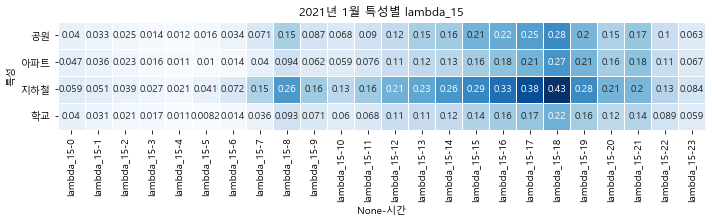

In [56]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 lambda_15')
plt.tight_layout()
plt.show()

In [57]:
data_pivot_lambda_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['lambda_15'], aggfunc = 'std')
data_pivot_lambda_std.head()

lambda_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.045749  0.040296  0.038946  0.017882  0.023167  0.035135  0.049249   
아파트  0.050127  0.040418  0.027606  0.023198  0.017211  0.020810  0.030253   
지하철  0.063260  0.054188  0.044163  0.033125  0.028989  0.062580  0.101858   
학교   0.045078  0.039708  0.034419  0.028216  0.017789  0.017849  0.031617   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.143144  0.234512  0.127206  0.076924  0.086665  0.111792  0.146428   
아파트  0.086792  0.182708  0.080155  0.060499  0.068608  0.090733  0.109489   
지하철  0.202818  0.306135  0.168980  0.114293  0.134418  0.173938  0.191914   
학교   0.050786  0.131363  0.089914  0.080663  0.065223  0.097955  0.102647   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.151738  0.213944  0.252241  0.225820  0.243836  0.179224  0.134310   
아파트  0.111376  0.144797  0.158695  0.175320  0.206474  0.163711  0.126338   
지하철  0.226715  0.264205  0.313757  0.363201  0.363726  0.230576  0.176878   
학교   0.109754  0.134413  0.169530  0.184726  0.205251  0.155139  0.113931   

                                   
시간         21        22        23  
특성                                 
공원   0.167553  0.109364  0.062308  
아파트  0.151836  0.097041  0.059532  
지하철  0.186947  0.122658  0.085823  
학교   0.125308  0.103629  0.062102

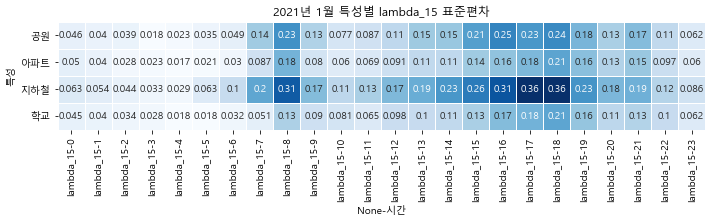

In [58]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_lambda_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 lambda_15 표준편차')
plt.tight_layout()
plt.show()

In [59]:
data_pivot_mu = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'])
data_pivot_mu.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.034135  0.027786  0.016657  0.015978  0.014923  0.028791  0.040473   
아파트  0.031395  0.027020  0.020120  0.014882  0.015048  0.029057  0.052461   
지하철  0.057873  0.049831  0.037654  0.027887  0.021486  0.021061  0.041328   
학교   0.032040  0.022445  0.015027  0.011546  0.010443  0.022105  0.041425   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.110039  0.179680  0.098809  0.087353  0.124661  0.163627  0.168601   
아파트  0.131235  0.206227  0.101846  0.091578  0.114233  0.135476  0.154307   
지하철  0.120910  0.267231  0.155044  0.120813  0.164520  0.209851  0.236927   
학교   0.093351  0.162915  0.087375  0.075772  0.097412  0.128220  0.128916   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.198975  0.221284  0.222942  0.222113  0.225128  0.152547  0.128203   
아파트  0.166528  0.170727  0.176921  0.185941  0.188685  0.127577  0.118141   
지하철  0.267657  0.292024  0.301810  0.338574  0.411851  0.292624  0.236482   
학교   0.147134  0.156765  0.158447  0.173648  0.155256  0.103852  0.087085   

                                   
시간         21        22        23  
특성                                 
공원   0.132575  0.081248  0.052005  
아파트  0.115647  0.067218  0.041237  
지하철  0.233755  0.125783  0.082096  
학교   0.097819  0.058018  0.041193

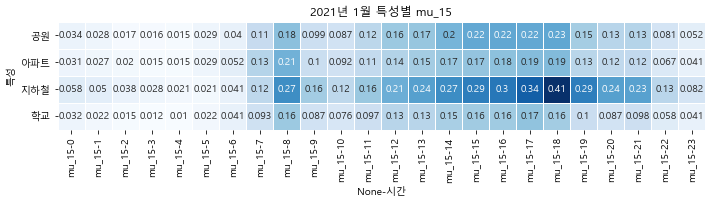

In [60]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 mu_15')
plt.tight_layout()
plt.show()

In [61]:
data_pivot_mu_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['mu_15'], aggfunc = 'std')
data_pivot_mu_std.head()

mu_15                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.040011  0.040780  0.022024  0.022512  0.039302  0.042343  0.060380   
아파트  0.034711  0.028094  0.023797  0.024828  0.027526  0.045754  0.069263   
지하철  0.057330  0.053196  0.044672  0.043904  0.031565  0.033093  0.053988   
학교   0.029983  0.031015  0.019300  0.019418  0.022963  0.041388  0.063531   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.109074  0.197784  0.099439  0.077759  0.095055  0.135277  0.133994   
아파트  0.134423  0.188390  0.085751  0.071064  0.087585  0.101885  0.110304   
지하철  0.145567  0.300027  0.139176  0.093055  0.122955  0.160207  0.184188   
학교   0.108440  0.191296  0.089243  0.064754  0.082962  0.096556  0.099003   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.172911  0.220826  0.205678  0.202146  0.215399  0.151814  0.124802   
아파트  0.114064  0.132133  0.136984  0.154282  0.184701  0.106281  0.108598   
지하철  0.226543  0.251307  0.275275  0.292027  0.360185  0.262880  0.213974   
학교   0.119592  0.138251  0.138424  0.159387  0.143939  0.094445  0.092038   

                                   
시간         21        22        23  
특성                                 
공원   0.118582  0.079740  0.056812  
아파트  0.098571  0.059106  0.037475  
지하철  0.200388  0.115128  0.080137  
학교   0.106448  0.054970  0.038587

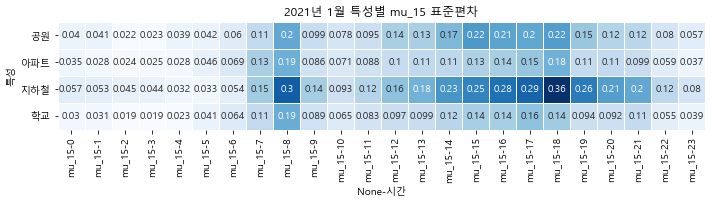

In [62]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_mu_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 mu_15 표준편차')
plt.tight_layout()
plt.show()

In [63]:
data_pivot_rho = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['rho'])
data_pivot_rho.head()

rho                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   1.190152  1.053995  1.090450  0.592404  0.438110  0.462402  1.186666   
아파트  1.490661  1.234272  1.161880  0.759010  0.461990  0.352259  0.414559   
지하철  1.020703  1.297319  1.213336  1.174105  0.924471  1.510224  2.274667   
학교   1.358215  1.302779  1.095251  0.983686  0.468767  0.349068  0.491813   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   1.142442  1.645619  1.376275  0.943386  0.918249  0.839944  0.907114   
아파트  0.527487  0.592119  0.711866  0.655364  0.670250  0.782231  0.802192   
지하철  1.810479  1.541643  1.270237  1.205404  1.042323  1.077296  1.085903   
학교   0.643754  1.330869  1.213478  0.842949  0.843661  0.895768  0.959119   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.874080  1.072342  1.026129  1.182482  1.550363  1.977843  1.437750   
아파트  0.757793  0.911322  1.048326  1.173462  1.651523  1.981740  1.913577   
지하철  1.020540  1.026936  1.094491  1.188830  1.173848  1.111695  1.025552   
학교   0.824961  0.918235  1.049240  1.142195  1.518265  1.831787  1.836356   

                                   
시간         21        22        23  
특성                                 
공원   1.727569  1.481790  1.506711  
아파트  1.941212  2.011741  1.701719  
지하철  1.040944  1.365658  1.281141  
학교   2.105473  1.615398  1.791552

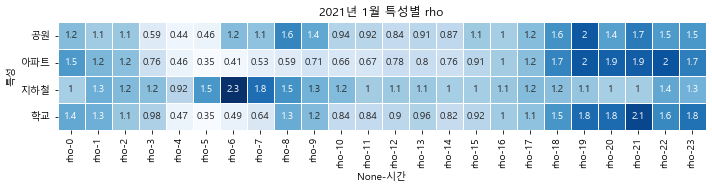

In [64]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_rho, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 rho')
plt.tight_layout()
plt.show()

In [65]:
data_pivot_L_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'])
data_pivot_L_s.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.443560  0.496959  0.461650  0.293913  0.286555  0.185040  0.409625   
아파트  0.483246  0.473533  0.375941  0.281337  0.201950  0.149873  0.183521   
지하철  0.682231  0.780110  0.763510  0.695418  0.621322  0.779687  1.000117   
학교   0.371274  0.328504  0.258811  0.254141  0.167291  0.118377  0.109517   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.420933  0.465320  0.477712  0.450051  0.413439  0.417268  0.515691   
아파트  0.209259  0.253574  0.328867  0.343635  0.351280  0.385342  0.407322   
지하철  0.937753  0.868004  0.907405  0.930386  0.872834  0.883711  0.859811   
학교   0.196366  0.251474  0.293681  0.274875  0.266382  0.330429  0.327860   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.453897  0.522926  0.528448  0.554331  0.578850  0.576024  0.527561   
아파트  0.412276  0.441336  0.480902  0.498352  0.551711  0.580015  0.535543   
지하철  0.862530  0.854097  0.923121  0.938588  0.874551  0.793617  0.742004   
학교   0.296158  0.331019  0.359642  0.357289  0.422295  0.428217  0.399577   

                                   
시간         21        22        23  
특성                                 
공원   0.572754  0.561199  0.529647  
아파트  0.583165  0.595658  0.586016  
지하철  0.721830  0.851718  0.822314  
학교   0.392914  0.440442  0.423103

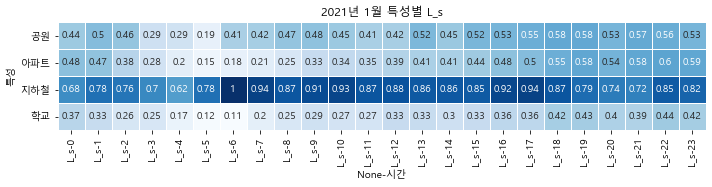

In [66]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 L_s')
plt.tight_layout()
plt.show()

In [67]:
data_pivot_L_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['L_s'], aggfunc = 'std')
data_pivot_L_s_std.head()

L_s                                                              \
시간         0         1         2         3         4         5         6    
특성                                                                          
공원   0.703029  0.738147  0.819171  0.517094  0.720957  0.371864  0.888945   
아파트  0.716926  0.668868  0.621130  0.594319  0.459691  0.378367  0.380210   
지하철  1.041121  1.052937  1.229068  1.186090  1.244894  1.506739  1.625140   
학교   0.675238  0.513538  0.529745  0.671566  0.583919  0.493920  0.306430   

                                                                           \
시간         7         8         9         10        11        12        13   
특성                                                                          
공원   0.779347  0.858741  0.792008  0.663958  0.607617  0.516547  0.706109   
아파트  0.469812  0.495443  0.521579  0.489454  0.426679  0.459515  0.540880   
지하철  1.427411  1.202075  1.258767  1.302835  1.095151  1.049333  1.037637   
학교   0.479481  0.499255  0.556552  0.462851  0.402912  0.528381  0.531109   

                                                                           \
시간         14        15        16        17        18        19        20   
특성                                                                          
공원   0.589490  0.697973  0.675442  0.685851  0.713279  0.714530  0.678079   
아파트  0.527586  0.532551  0.594323  0.624028  0.694179  0.727970  0.680803   
지하철  0.975938  1.005583  1.061872  1.126437  0.997280  0.876816  0.857974   
학교   0.437291  0.499586  0.558815  0.559127  0.662951  0.660784  0.589091   

                                   
시간         21        22        23  
특성                                 
공원   0.755048  0.732686  0.695049  
아파트  0.763095  0.748836  0.792385  
지하철  0.932944  1.050372  1.003083  
학교   0.553561  0.695767  0.659823

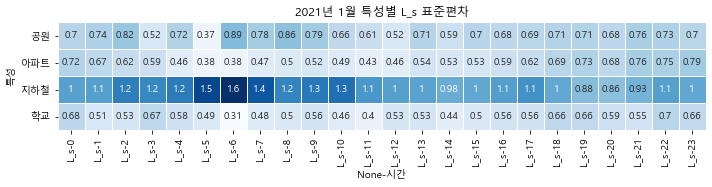

In [68]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_L_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 L_s 표준편차')
plt.tight_layout()
plt.show()

In [69]:
data_pivot_W_s = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'])
data_pivot_W_s.head()

W_s                                                         \
시간          0          1          2          3          4          5    
특성                                                                      
공원   19.658855  30.980700  38.467127  24.982421  32.369983  19.247888   
아파트  23.777064  32.049527  33.157630  26.368827  23.856078  14.944821   
지하철  19.483904  33.737173  40.883784  50.861542  51.397557  52.753701   
학교   17.191820  23.560604  21.225655  19.377898  15.682427  12.058959   

                                                                               \
시간          6          7         8          9          10        11        12   
특성                                                                              
공원   26.022235  10.357086  5.493637  10.059420   8.618717  5.172367  3.631096   
아파트  13.102835   6.823387  3.540043   7.906839   6.180168  5.104846  4.122088   
지하철  41.765325  17.762024  7.691431   9.170271  10.903983  7.113529  5.542377   
학교    7.658051   7.340250  4.703566   8.070491   6.017581  4.379341  3.586996   

                                                                           \
시간         13        14        15        16        17        18        19   
특성                                                                          
공원   3.623801  2.927717  2.971944  2.742657  2.761487  2.969298  4.387536   
아파트  3.554407  3.311057  3.295227  3.276769  3.152946  3.481015  4.983261   
지하철  4.786272  4.467415  3.945039  3.925382  3.536849  2.916028  4.105182   
학교   3.570411  2.779294  2.715823  2.742539  2.756638  2.721066  4.294292   

                                               
시간         20        21         22         23  
특성                                             
공원   5.411803  5.466666   9.500160  15.041523  
아파트  6.038250  5.819047  13.780427  20.945968  
지하철  5.326285  5.243325  11.831170  18.327703  
학교   5.563361  5.906841   8.713807  14.613723

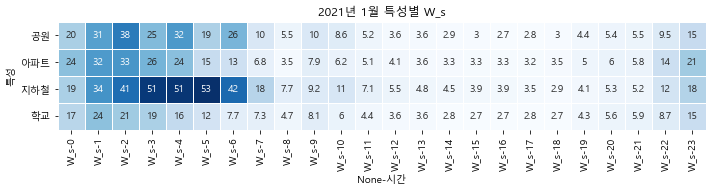

In [70]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 W_s')
plt.tight_layout()
plt.show()

In [71]:
data_pivot_W_s_std = data.pivot_table(index = ['특성'], columns = ['시간'], values = ['W_s'], aggfunc = 'std')
data_pivot_W_s_std.head()

W_s                                                           \
시간          0          1          2          3           4           5    
특성                                                                        
공원   40.533708  57.741522  78.657495  50.913955   85.302367   47.301304   
아파트  43.048931  56.077125  61.621627  60.659409   56.830999   40.168873   
지하철  29.144597  57.677013  64.678166  85.245991  109.682362  100.974165   
학교   33.596480  42.987234  48.916023  43.746565   51.705259   55.770095   

                                                                      \
시간          6          7          8          9          10        11   
특성                                                                     
공원   59.395948  18.685429   9.588759  20.868629  12.085578  7.746186   
아파트  27.436614  16.461655   7.019767  14.942367   7.002916  5.985921   
지하철  72.372170  30.667024  14.167990  10.667842  11.708190  5.647466   
학교   21.319145  22.664142  14.002199  19.953978   8.497245  5.584686   

                                                                           \
시간         12        13        14        15        16        17        18   
특성                                                                          
공원   3.855987  3.819230  2.914266  3.069723  2.833919  2.807527  3.270102   
아파트  4.863215  3.767443  3.455693  3.774261  3.572194  3.494674  4.226247   
지하철  4.242012  3.564766  3.411194  2.914589  2.810398  2.614891  2.255528   
학교   5.195257  5.771324  3.525501  3.476680  3.592005  5.831388  3.539419   

                                                           
시간         19         20         21         22         23  
특성                                                         
공원   5.324874   8.143014   7.832028  13.543342  21.383741  
아파트  6.292530  10.994630   7.443487  26.796267  31.664195  
지하철  3.262505   4.963641   4.932969  14.125193  20.925776  
학교   5.649892   8.173737  11.004261  12.725418  25.675102

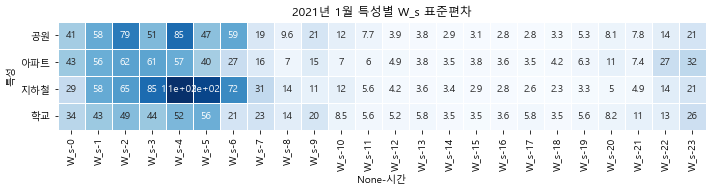

In [72]:
plt.figure(figsize = (10, 20))
sns.heatmap(data_pivot_W_s_std, square = True, annot = True, cmap = 'Blues', linewidth = 0.5, cbar = False)
plt.title('2021년 1월 특성별 W_s 표준편차')
plt.tight_layout()
plt.show()